## Quant Research:

* Analysing the distribution of a stock returns
* Deriving a stock beta
* Determining correlations between two or more stocks
* Calculating rate of change
* Backtesting a strategy

While choosing portfolio, choose uncorelated stocks

Decide your strategy as per the momentum of the market.


### Backtest Moving Average Crossover on multiple Stocks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Fetch the stock data
data = pd.read_csv('/home/rvl224/Downloads/aapl_daily_data.csv', index_col = 0, parse_dates = True)
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,1.159,1.161,1.143,1.150,0.991,278588800
2005-01-03,1.157,1.163,1.118,1.130,0.973,691992000
2005-01-04,1.139,1.169,1.124,1.142,0.983,1096810400
2005-01-05,1.151,1.165,1.144,1.152,0.992,680433600
2005-01-06,1.155,1.159,1.131,1.153,0.993,705555200
...,...,...,...,...,...,...
2021-02-12,134.350,135.530,133.690,135.370,135.370,60029300
2021-02-16,135.490,136.010,132.790,133.190,133.190,80206200
2021-02-17,131.250,132.220,129.470,130.840,130.840,97918500


In [3]:
#Strategy Params
sma = 10
lma = 20

In [4]:
# 2. Calculate buy and hold returns
data['d_returns'] = data['Adj Close'].pct_change()

In [5]:
# 3. Calculate rules- moving aveages
data['sma'] = data['Adj Close'].rolling(sma).mean()
data['lma'] = data['Adj Close'].rolling(lma).mean()

In [6]:
# 4. calculate trading signals
data['signals'] = np.where(data['sma'] >= data['lma'], 1, -1)

In [7]:
# Dropping Null Values
data.dropna(inplace = True)

In [8]:
# 5. Calculate strategy returns
data['s_returns'] = data['d_returns']*data['signals'].shift(1)

In [9]:
# Cumulative returns
cum_s_returns = (data['s_returns']+1).cumprod()

In [10]:
#Net returns
print('Cumulative strategy returns:', round(cum_s_returns.iloc[-1] -1, 3))

Cumulative strategy returns: 4.559


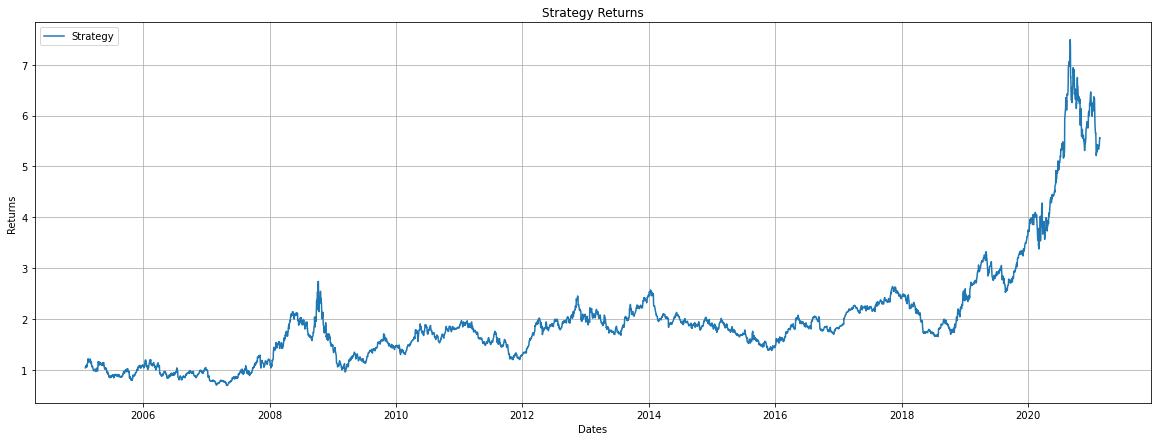

In [11]:
#Visualize

plt.figure(figsize = (20,7))
plt.plot(cum_s_returns, label = 'Strategy')
plt.title('Strategy Returns')
plt.xlabel('Dates')
plt.ylabel('Returns')
plt.grid()
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

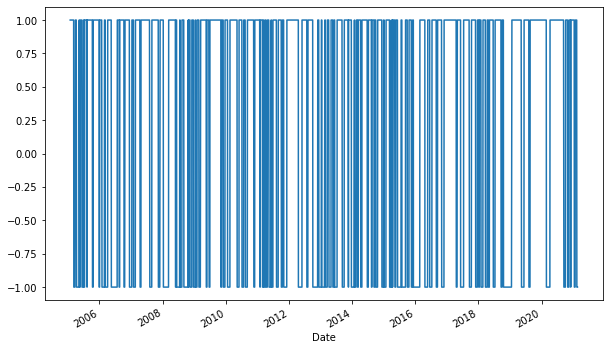

In [12]:
data['signals'].plot(figsize = (10,6))

Text(0, 0.5, 'Signals')

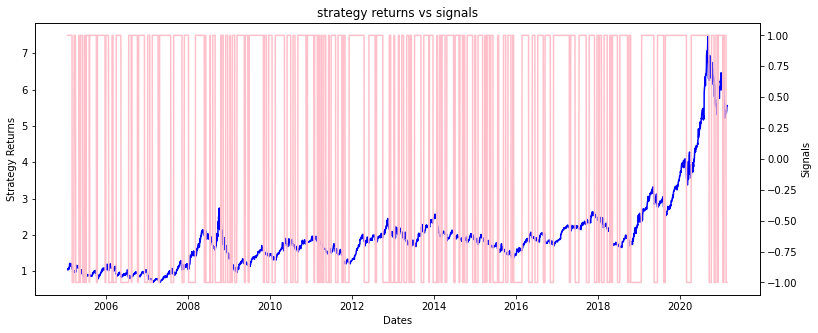

In [13]:
# Visualize strategy returns vs signals
fig, ax1 = plt.subplots(figsize =(13,5))

ax2 = ax1.twinx()
ax1.plot(cum_s_returns, color = 'blue')
ax2.plot(data['signals'], color = 'pink')

ax1.set_title('strategy returns vs signals')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Strategy Returns')
ax2.set_ylabel('Signals')

In [15]:
import yfinance as yf

#Define Stock List
stock_list =['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']

#Define strategy parameters
sma = 10
lma = 20

In [18]:
# RUn strategy
sec_returns = dict()

def backtest_strategy(data, sma, lma):
    data['d_returns'] = data['Adj Close'].pct_change()
    
    data['sma'] = data['Adj Close'].rolling(sma).mean()
    data['lma'] = data['Adj Close'].rolling(lma).mean()
    
    data['signals'] = np.where(data['sma'] >= data['lma'], 1, -1)
    
    data.dropna(inplace = True)
    
    data['s_returns'] = data['d_returns']* data['signals'].shift(1)
    cum_s_returns = (data['s_returns'] + 1).cumprod()
    return round(cum_s_returns.iloc[-1] -1, 3)

for stock in stock_list:
    data = yf.download(stock, start = '2013-01-01', end = '2020-12-31')
    net_returns = backtest_strategy(data, sma, lma)
    print(f'Cumulative strategy returns for {stock}: ', net_returns)
    sec_returns[stock] = net_returns
    
else:
    print('Computations Complete')

[*********************100%***********************]  1 of 1 completed
Cumulative strategy returns for FB:  -0.171
[*********************100%***********************]  1 of 1 completed
Cumulative strategy returns for AAPL:  1.97
[*********************100%***********************]  1 of 1 completed
Cumulative strategy returns for AMZN:  1.094
[*********************100%***********************]  1 of 1 completed
Cumulative strategy returns for NFLX:  -0.564
[*********************100%***********************]  1 of 1 completed
Cumulative strategy returns for GOOGL:  -0.738
Computations Complete


In [19]:
sec_returns

{'FB': -0.171, 'AAPL': 1.97, 'AMZN': 1.094, 'NFLX': -0.564, 'GOOGL': -0.738}

<function matplotlib.pyplot.show(close=None, block=None)>

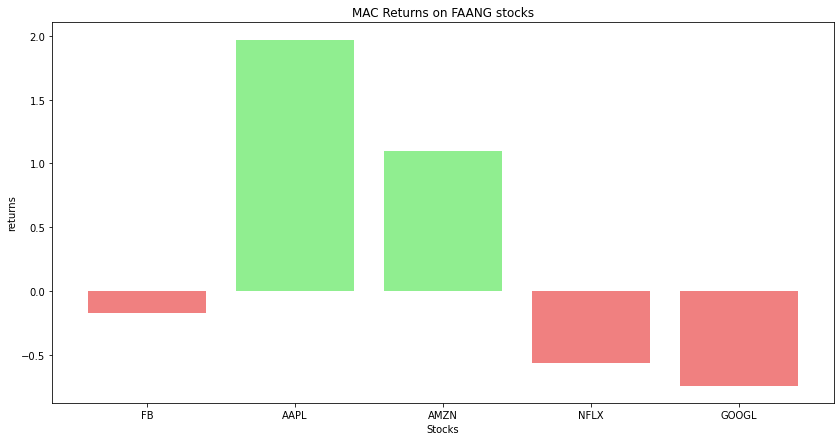

In [22]:
plt.figure(figsize = (14,7))
plt.bar(sec_returns.keys(), sec_returns.values(), color = ['lightcoral', 'lightgreen', 'lightgreen', 'lightcoral'])
plt.title('MAC Returns on FAANG stocks')
plt.xlabel('Stocks')
plt.ylabel('returns')
plt.show